<a href="https://colab.research.google.com/github/BossAyush07/Deep-Learning-Projects/blob/master/Mushroom_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"boss0ayush","key":"1fa540a28ee73b9f1504169bfda092c7"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d uciml/mushroom-classification

  0% 0.00/34.2k [00:00<?, ?B/s]
100% 34.2k/34.2k [00:00<00:00, 13.2MB/s]


In [6]:
!unzip mushroom-classification.zip

Archive:  mushroom-classification.zip
  inflating: mushrooms.csv           


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
data  = pd.read_csv('mushrooms.csv')

In [9]:
data.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,m


In [16]:
data.info

<bound method DataFrame.info of      class cap-shape cap-surface  ... spore-print-color population habitat
0        p         x           s  ...                 k          s       u
1        e         x           s  ...                 n          n       g
2        e         b           s  ...                 n          n       m
3        p         x           y  ...                 k          s       u
4        e         x           s  ...                 n          a       g
...    ...       ...         ...  ...               ...        ...     ...
8119     e         k           s  ...                 b          c       l
8120     e         x           s  ...                 b          v       l
8121     e         f           s  ...                 b          c       l
8122     p         k           y  ...                 w          v       l
8123     e         x           s  ...                 o          c       l

[8124 rows x 23 columns]>

In [11]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

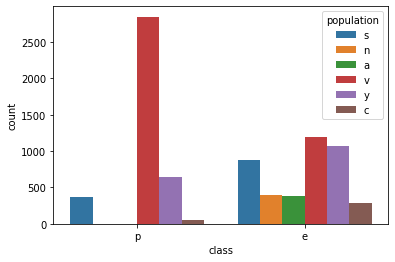

In [13]:
sns.countplot(x=data['class'],hue='population',data=data)

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in list(data.columns):
    data[i]=le.fit_transform(data[i])

In [18]:
data.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1
5,0,5,3,9,1,0,1,0,0,5,0,2,2,2,7,7,0,2,1,4,2,2,1
6,0,0,2,8,1,0,1,0,0,2,0,2,2,2,7,7,0,2,1,4,2,2,3
7,0,0,3,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,3,3
8,1,5,3,8,1,6,1,0,1,7,0,3,2,2,7,7,0,2,1,4,2,4,1
9,0,0,2,9,1,0,1,0,0,2,0,2,2,2,7,7,0,2,1,4,2,3,3


In [19]:
y=data['class']
x=data.drop(['class'],axis=1)

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression(max_iter=10000)
lr.fit(x_train,y_train)
pred_1=lr.predict(x_test)
score_1=accuracy_score(y_test,pred_1)

In [22]:
score_1

0.952